### K-NN Regression (K-Nearest Neighbors Regression 최근접 이웃 회귀)

![nn](Images/K_NN_R.jpg)

 K-NN Regression (K-Nearest Neighbors Regression 최근접 이웃 회귀)
 - 최근접한 이웃의 평균값을 따라간다.

## 농어의 무게를 예측하기

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0])

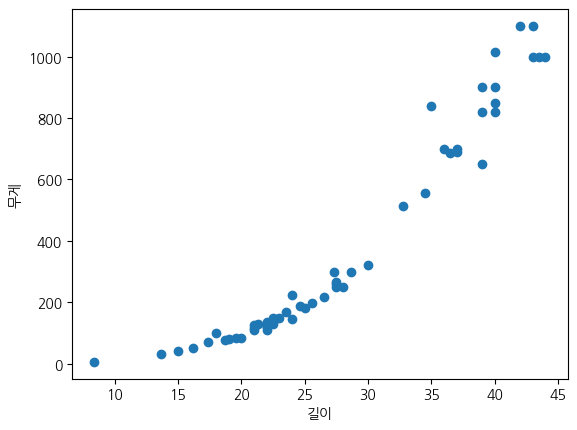

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'Nanum Gothic'

plt.scatter(perch_length, perch_weight)
plt.xlabel('길이')
plt.ylabel('무게')
plt.show();

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split as tts

# K-Nearest Nerighbors Regression (k-최근접이웃 회귀) 모델 호출
knr = KNeighborsRegressor()

# random_state의 민감도 모델/데이터의 취약점을 보안하기위해 안정성있는 랜덤 시드값 찾기
max_score = 0
good_seed = 0
for seed in range(100) :
    # 훈련과 테스트 세트 분리
    tr_in, test_in, tr_target, test_target = tts(perch_length, perch_weight, random_state=seed, test_size=0.3)
    
    # 훈련과 테스트 세트를 훈련하기위해서 2차원 리스트로 변경
    tr_in = tr_in.reshape(-1, 1)
    test_in = test_in.reshape(-1, 1)
    
    # 훈련및 훈련 점수 
    knr.fit(tr_in, tr_target)
    score = knr.score(test_in, test_target)
    
    # 최적의 값이 나오는 시드를 찾아낸다.
    # print(f'max_score : {max_score}, score :{score} ==> seed : {seed}')
    if score >= max_score :
        max_score = score
        good_seed = seed
        print(f'max_score : {max_score * 100:.4f}, score :{score * 100:.4f} ==> seed : {seed}')
              
print(f'max_score : {max_score * 100:.4f}, good_seed : {good_seed}')      


max_score : 96.1551, score :96.1551 ==> seed : 0
max_score : 98.0029, score :98.0029 ==> seed : 2
max_score : 98.4592, score :98.4592 ==> seed : 8
max_score : 98.5380, score :98.5380 ==> seed : 13
max_score : 98.6927, score :98.6927 ==> seed : 29
max_score : 99.7957, score :99.7957 ==> seed : 36
max_score : 99.7957, good_seed : 36


In [4]:
# 최상의 훈련세트 시드값 적용
tr_in, test_in, tr_target, test_target = tts(perch_length, perch_weight, random_state=good_seed)

# 훈련과 테스트 세트를 훈련하기위해서 2차원 리스트로 변경
tr_in = tr_in.reshape(-1, 1)
test_in = test_in.reshape(-1, 1)

print(f'Train input({len(tr_in)}) :\n{tr_in} \n')
print(f'Test input({len(test_in)})  : \n{test_in}')
    
# 훈련
knr.fit(tr_in, tr_target)

# 정확도
knr.score(test_in, test_target)

Train input(42) :
[[40. ]
 [23.5]
 [17.4]
 [19. ]
 [40. ]
 [21. ]
 [40. ]
 [27.5]
 [40. ]
 [16.2]
 [24. ]
 [24. ]
 [28.7]
 [39. ]
 [44. ]
 [34.5]
 [22.7]
 [42. ]
 [43. ]
 [21.3]
 [22.5]
 [22. ]
 [35. ]
 [13.7]
 [37. ]
 [23. ]
 [36. ]
 [39. ]
 [27.5]
 [25. ]
 [ 8.4]
 [30. ]
 [18.7]
 [32.8]
 [20. ]
 [39. ]
 [24.6]
 [27.5]
 [36.5]
 [27.3]
 [28. ]
 [18. ]] 

Test input(14)  : 
[[21. ]
 [19.6]
 [22.5]
 [21. ]
 [25.6]
 [26.5]
 [43. ]
 [22. ]
 [15. ]
 [22. ]
 [43.5]
 [22. ]
 [22. ]
 [37. ]]


0.9978250673482761

In [5]:
from sklearn.metrics import mean_absolute_error

# 해당 세트에 대한 예측 값을 만든다.
# predict는 데이터를 추가 또는 업데이트가 아니고 예측값을 반환하는 것
test_prediction = knr.predict(test_in)

# 해당 세트의 평균 절대값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(f'평균 절대값 오차 범위 : {mae:.2f}g')

평균 절대값 오차 범위 : 11.89g
